# K Means Clustering Algorithm

## Studi Kasus

Data yang anda miliki adalah sebagai berikut :
#
KODE= Kode Produk
NAMA= Nama Produk
QTY = Jumlah Terjual
HARGA= Harga Jual
DISC %= Discount persen
DISC(Rp)= Discount harga
SHELF LIFE= Masa penyimpanan dalam bulan


## Import Libraries and Data

In [1]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path1 = '/content/gdrive/MyDrive/Intermediate 4/Data/'

# Cek directory
os.listdir(path1)

['stock keeping unit.xlsx', 'Clustering_product.csv', 'customer_segments.csv']

In [229]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path2 = '/content/gdrive/MyDrive/Intermediate 4/'

# Cek directory
os.listdir(path2)

['Data',
 'Breakout Room.ipynb',
 'Referensi jawaban BreakoutRoom.ipynb',
 'Coba-coba Project.ipynb',
 'Meeting 4 Clustering.ipynb',
 'Salinan Referensi Project Capstone2.ipynb',
 'Categorical_Nama.xlsx',
 'Salinan Categorical.xlsx',
 'Categorical.xlsx',
 'segment0.xlsx',
 'segment1.xlsx',
 'Referensi Project Capstone2.ipynb',
 'Question14_Clustering.ipynb',
 'MIE.xlsx',
 'data_produk_asumsi_penjualantinggi.xlsx']

In [230]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path3 = '/content/gdrive/MyDrive/Intermediate 4/'

# Cek directory
os.listdir(path3)

['Data',
 'Breakout Room.ipynb',
 'Referensi jawaban BreakoutRoom.ipynb',
 'Coba-coba Project.ipynb',
 'Meeting 4 Clustering.ipynb',
 'Salinan Referensi Project Capstone2.ipynb',
 'Categorical_Nama.xlsx',
 'Salinan Categorical.xlsx',
 'Categorical.xlsx',
 'segment0.xlsx',
 'segment1.xlsx',
 'Referensi Project Capstone2.ipynb',
 'Question14_Clustering.ipynb',
 'MIE.xlsx',
 'data_produk_asumsi_penjualantinggi.xlsx']

In [232]:
#DATA CLUSTER JAGA"(supaya ketika data terubah banyak dan kita mau mengembalikan tinggal ganti var)
customer = pd.read_excel(os.path.join(path2, "Categorical.xlsx"))
customer

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
0,13,1.214286,3585.714286,0.0,0.0,20.857143
1,14,1.093750,4491.406250,0.0,0.0,20.726562
2,1005,1.000000,13315.000000,0.0,0.0,21.000000
3,1006,1.400000,21430.000000,0.0,0.0,16.800000
4,1019,1.000000,21430.000000,0.0,0.0,21.000000
...,...,...,...,...,...,...
4112,262989,1.666667,2040.000000,0.0,0.0,15.000000
4113,262990,1.600000,2040.000000,0.0,0.0,18.300000
4114,262991,1.000000,2040.000000,0.0,0.0,19.000000
4115,262992,1.000000,4845.000000,0.0,0.0,26.000000


In [233]:
# Load data
customer_data = pd.read_excel(os.path.join(path1,"stock keeping unit.xlsx"))
customer_data

,KODE,NAMA,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
0,17447,INDOMI AYAM SPC/CR,-5.000,32300,0.0,0,36
1,17447,INDOMI AYAM SPC/CR,-1.000,32300,0.0,0,28
2,24057,BAWANG PUTIH TIMB.,0.038,9100,0.0,0,10
3,24249,PERMEN PURE MRT,0.038,30000,0.0,0,6
4,24543,BAWANG BOMBAY TIMB.,0.056,5500,0.0,0,11
...,...,...,...,...,...,...,...
14386,30019,GULA PASIR 1 KG/PTH,50.000,6300,0.0,0,36
14387,10486,ROMA BETTER RENT 25,67.000,500,0.0,0,19
14388,17378,SEDAAP AYAM BAWANG,80.000,650,0.0,0,25
14389,8382,TANG KECIL,150.000,1175,0.0,0,33


In [234]:
dataextrack_produk=pd.read_excel(os.path.join(path3,"data_produk_asumsi_penjualantinggi.xlsx"))
dataextrack_produk

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
0,17130.0,40.000000,935.0,0,0,10.000000
1,12053.0,30.000000,390.0,0,0,12.000000
2,17406.0,15.500000,500.0,0,0,21.000000
3,10577.0,10.666667,445.0,0,0,15.666667
4,8384.0,10.000000,1190.0,0,0,10.000000
...,...,...,...,...,...,...
379,100252.0,1.400000,2370.0,0,0,19.400000
380,68629.0,1.400000,1765.0,0,0,20.000000
381,3006.0,1.400000,9160.0,0,0,18.800000
382,24640.0,1.400000,1400.0,0,0,20.200000


In [97]:
#MELALUI ANALISIS MANUAL SUPERMI&INDOMIE MEMILIKI PENUALAN YG BESAR
new_data_MI=customer_data[customer_data['NAMA'].str.contains('INDOMI')]
new_data_MI

,KODE,NAMA,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
0,17447,INDOMI AYAM SPC/CR,-5.0,32300,0.0,0,36
1,17447,INDOMI AYAM SPC/CR,-1.0,32300,0.0,0,28
4355,17447,INDOMI AYAM SPC/CR,1.0,32300,0.0,0,12
4356,17040,INDOMI BASO SAPI,1.0,840,0.0,0,26
4357,17040,INDOMI BASO SAPI,1.0,840,0.0,0,35
...,...,...,...,...,...,...,...
14364,17037,INDOMI GR.SPESIAL,20.0,950,0.0,0,32
14365,17041,INDOMI SOTO MIE,20.0,770,0.0,0,6
14366,17041,INDOMI SOTO MIE,20.0,770,0.0,0,11
14372,17037,INDOMI GR.SPESIAL,25.0,950,0.0,0,17


In [102]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14391 entries, 0 to 14390
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KODE        14391 non-null  int64  
 1   NAMA        14391 non-null  object 
 2   QTY         14391 non-null  float64
 3   HARGA       14391 non-null  int64  
 4   DISC (%)    14391 non-null  float64
 5   DISC (Rp)   14391 non-null  int64  
 6   SHELF LIFE  14391 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 787.1+ KB


In [109]:
#MELALUI ANALISIS MANUAL SUPERMI&INDOMIE MEMILIKI PENUALAN YG BESAR
new_data_MI1=customer_data[customer_data['NAMA'].str.contains('SUPERMI')]
new_data_MI1

,KODE,NAMA,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
10507,17055,SUPERMI AYAM BAWANG,1.0,640,0.0,0,35
10508,17055,SUPERMI AYAM BAWANG,1.0,640,0.0,0,23
10509,17055,SUPERMI AYAM BAWANG,1.0,640,0.0,0,22
10510,17055,SUPERMI AYAM BAWANG,1.0,640,0.0,0,33
10511,17055,SUPERMI AYAM BAWANG,1.0,640,0.0,0,22
...,...,...,...,...,...,...,...
14310,17335,SUPERMI SEDAP GORENG,10.0,725,0.0,0,33
14311,17335,SUPERMI SEDAP GORENG,10.0,725,0.0,0,35
14312,17422,SUPERMI SEDAP K.AYAM,10.0,640,0.0,0,25
14384,17335,SUPERMI SEDAP GORENG,40.0,725,0.0,0,22


#DICARI DATA YG UNIK MENGGUNAKAN KODE

In [72]:
categorical_MI=new_data_MI.groupby(['KODE','NAMA'])['KODE','QTY','HARGA','DISC (%)','DISC (Rp)', 'SHELF LIFE'].mean()
categorical_MI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17035,INDOMI KRIT GRG SPC,17035.0,1.000000,1960.0,0.0,0.0,23.444444
17036,INDOMI KRIT AY.PANGG,17036.0,1.000000,1960.0,0.0,0.0,16.200000
17037,INDOMI GR.SPESIAL,17037.0,5.308271,950.0,0.0,0.0,20.977444
17038,INDOMI AYAM SPECIAL,17038.0,5.000000,825.0,0.0,0.0,14.000000
17039,INDOMI AYAM BAWANG,17039.0,5.000000,785.0,0.0,0.0,16.000000
17040,INDOMI BASO SAPI,17040.0,3.739130,840.0,0.0,0.0,21.869565
17041,INDOMI SOTO MIE,17041.0,4.745455,770.0,0.0,0.0,20.636364
17130,INDOMI KARI AYAM,17130.0,40.000000,935.0,0.0,0.0,10.000000
17444,INDOMI GR.SPC/CR,17444.0,2.428571,37000.0,0.0,0.0,19.142857


In [73]:
categorical_MI1=new_data_MI1.groupby(['KODE','NAMA'])['KODE','QTY','HARGA','DISC (%)','DISC (Rp)', 'SHELF LIFE'].mean()
categorical_MI1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17055,SUPERMI AYAM BAWANG,17055.0,3.250000,640.0,0.0,0.0,20.850000
17335,SUPERMI SEDAP GORENG,17335.0,15.500000,725.0,0.0,0.0,26.357143
17422,SUPERMI SEDAP K.AYAM,17422.0,2.217391,640.0,0.0,0.0,18.347826


In [110]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14391 entries, 0 to 14390
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KODE        14391 non-null  int64  
 1   NAMA        14391 non-null  object 
 2   QTY         14391 non-null  float64
 3   HARGA       14391 non-null  int64  
 4   DISC (%)    14391 non-null  float64
 5   DISC (Rp)   14391 non-null  int64  
 6   SHELF LIFE  14391 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 787.1+ KB


In [111]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KODE        4117 non-null   int64  
 1   QTY         4117 non-null   float64
 2   HARGA       4117 non-null   float64
 3   DISC (%)    4117 non-null   float64
 4   DISC (Rp)   4117 non-null   float64
 5   SHELF LIFE  4117 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 193.1 KB


In [75]:
customer_data.describe()

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
count,14391.000000,14391.000000,14391.000000,14391.00000,14391.000000,14391.000000
mean,57338.499479,1.535046,4562.403238,0.06987,6.733028,20.936349
std,58306.800177,3.585744,5463.077488,0.95658,97.895745,8.933068
min,13.000000,-5.000000,150.000000,0.00000,0.000000,6.000000
25%,14037.500000,1.000000,1455.000000,0.00000,0.000000,13.000000
50%,30021.000000,1.000000,2860.000000,0.00000,0.000000,21.000000
75%,78189.000000,1.000000,5600.000000,0.00000,0.000000,29.000000
max,709054.000000,320.000000,138460.000000,16.50000,3036.000000,36.000000


In [117]:
#GROUP BY BERDASARKAN KODE YG SAMA UNTUK SEMUA DATA DARI 14K DATA MENJADI 4K
categorical=customer_data.groupby(['KODE','NAMA'])['KODE', 'NAMA','QTY','HARGA','DISC (%)','DISC (Rp)', 'SHELF LIFE'].mean()
customer_data=categorical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [118]:
customer_data

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
13,ROTI BASAH KOTABARU,13.0,1.214286,3585.714286,0.0,0.0,20.857143
14,ROTI BASAH SAMBILEGI,14.0,1.093750,4491.406250,0.0,0.0,20.726562
1005,SGM 3 VANILA BOX 300,1005.0,1.000000,13315.000000,0.0,0.0,21.000000
1006,DANCOW BLT MD 1+ 400,1006.0,1.400000,21430.000000,0.0,0.0,16.800000
1019,DANCOW BLT MD 3+ 400,1019.0,1.000000,21430.000000,0.0,0.0,21.000000
...,...,...,...,...,...,...,...
262989,KISPRAY 3IN1 6'MERAH,262989.0,1.666667,2040.000000,0.0,0.0,15.000000
262990,KISPRAY 3IN1 6'BIRU,262990.0,1.600000,2040.000000,0.0,0.0,18.300000
262991,KISPRAY 3IN1 6'KNG,262991.0,1.000000,2040.000000,0.0,0.0,19.000000


In [ ]:
#categorical.to_excel('/content/gdrive/MyDrive/Intermediate 4/Categorical.xlsx',index=False)

> **Dalam materi ini, data preprocessing seperti cek missing value, duplicate data, data type tidak akan dilakukan, karena fokus dari materi adalah pada clustering. Anda dapat membuka kembali materi sebelumnya dan menerapkankan sendiri dalam materi ini jika ingin menganalisis secara lengkap.**

## Exploratory Data Analysis (EDA)

In [85]:
customer_data['HARGA']=customer_data['HARGA'].astype(float)

In [86]:
customer_data['DISC (Rp)']=customer_data['DISC (Rp)'].astype(float)

In [119]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4117 entries, (13, 'ROTI BASAH KOTABARU') to (709054, "KIKY'HEART FRAME STA")
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KODE        4117 non-null   float64
 1   QTY         4117 non-null   float64
 2   HARGA       4117 non-null   float64
 3   DISC (%)    4117 non-null   float64
 4   DISC (Rp)   4117 non-null   float64
 5   SHELF LIFE  4117 non-null   float64
dtypes: float64(6)
memory usage: 273.5+ KB


In [ ]:
customer_data[0:1000]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
13,ROTI BASAH KOTABARU,13.0,1.214286,3585.714286,0.0,0.0,20.857143
14,ROTI BASAH SAMBILEGI,14.0,1.093750,4491.406250,0.0,0.0,20.726562
1005,SGM 3 VANILA BOX 300,1005.0,1.000000,13315.000000,0.0,0.0,21.000000
1006,DANCOW BLT MD 1+ 400,1006.0,1.400000,21430.000000,0.0,0.0,16.800000
1019,DANCOW BLT MD 3+ 400,1019.0,1.000000,21430.000000,0.0,0.0,21.000000
...,...,...,...,...,...,...,...
12725,KIT-KAT 2F WHITE,12725.0,1.000000,1600.000000,0.0,0.0,20.000000
12731,KIT-KAT 2F MP.WHT/6',12731.0,1.000000,8930.000000,0.0,0.0,15.000000
12732,KINO 105 KOPI,12732.0,1.000000,2300.000000,0.0,0.0,30.000000


In [ ]:
customer_data[customer_data["KODE"].duplicated(keep=False)]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,


#analisis data "TER.."

In [112]:
#Jumlah penjualan terbanyak 
customer_data_qty_highest = customer_data.sort_values('QTY', ascending=False)
customer_data_qty_highest[0:10]

,KODE,NAMA,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
14390,17335,SUPERMI SEDAP GORENG,320.0,725,0.0,0,20
14389,8382,TANG KECIL,150.0,1175,0.0,0,33
14388,17378,SEDAAP AYAM BAWANG,80.0,650,0.0,0,25
14387,10486,ROMA BETTER RENT 25,67.0,500,0.0,0,19
14386,30019,GULA PASIR 1 KG/PTH,50.0,6300,0.0,0,36
14385,30025,GULA PASIR 1 KG/KNG,45.0,6100,0.0,0,6
14384,17335,SUPERMI SEDAP GORENG,40.0,725,0.0,0,22
14383,17379,SEDAAP GORENG,40.0,790,0.0,0,20
14382,17378,SEDAAP AYAM BAWANG,40.0,650,0.0,0,27
14381,17130,INDOMI KARI AYAM,40.0,935,0.0,0,10


In [113]:
#Jumlah penjualan tersedikit
customer_data_qty_lowest = customer_data.sort_values('QTY', ascending=True)
customer_data_qty_lowest[0:10]

,KODE,NAMA,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
0,17447,INDOMI AYAM SPC/CR,-5.000,32300,0.0,0,36
1,17447,INDOMI AYAM SPC/CR,-1.000,32300,0.0,0,28
2,24057,BAWANG PUTIH TIMB.,0.038,9100,0.0,0,10
3,24249,PERMEN PURE MRT,0.038,30000,0.0,0,6
4,24543,BAWANG BOMBAY TIMB.,0.056,5500,0.0,0,11
5,24241,PERMEN XINO XIXI/MM,0.068,31000,0.0,0,7
6,26070,S&W CHERY BUAH,0.071,48750,0.0,0,13
7,24238,PERMEN WHITE RABBIT,0.082,34000,0.0,0,12
8,24286,PERMEN TOFFE,0.084,33000,0.0,0,6
9,24057,BAWANG PUTIH TIMB.,0.088,9100,0.0,0,31


In [123]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KODE        4117 non-null   int64  
 1   QTY         4117 non-null   float64
 2   HARGA       4117 non-null   float64
 3   DISC (%)    4117 non-null   float64
 4   DISC (Rp)   4117 non-null   float64
 5   SHELF LIFE  4117 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 193.1 KB




disini ada yg unik INDOMI AYAM  QTY ==0 , karena ditemukan 4 data INDOMI AYAM SPC/CR yg apabila ditambah akan menghasilkan nilai 0, hal ini tidak banyak mempengaruhi data sehingga dibiarkan

In [129]:
#Waktu ketahan produk yang lama menurut SHELF LIFE
customer_data_shelflife_highest = customer_data.sort_values('SHELF LIFE', ascending=False)
customer_data_shelflife_highest[0:10]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
68457,MEDICARE 110 BLU/FML,68457.0,1.0,995.0,0.0,0.0,36.0
87453,EXTRM-SPL CLG 75SPR,87453.0,1.0,4965.0,0.0,0.0,36.0
254417,KRJ MINI OV M-806/AS,254417.0,1.0,3675.0,0.0,0.0,36.0
60645,DECOLSIN 4' FOR BARU,60645.0,1.0,2035.0,0.0,0.0,36.0
12871,LOTTE FANTASIA 112GR,12871.0,1.0,3640.0,0.0,0.0,36.0
260178,KESET MIDANG KC /TY,260178.0,1.0,5000.0,0.0,0.0,36.0
7052,MORIN 225 MIX FRUIT,7052.0,1.0,8160.0,0.0,0.0,36.0
9105,IF BB.50 OPOR AYAM,9105.0,1.0,2620.0,0.0,0.0,36.0
257115,GELAS JG-13 ZODIAC,257115.0,1.0,8400.0,0.0,0.0,36.0


In [130]:
#Waktu ketahan produk yang singkat menurut SHELF LIFE
customer_data_shelflife_lowest = customer_data.sort_values('SHELF LIFE', ascending=True)
customer_data_shelflife_lowest[0:10]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
6152,MARQUISA PP SUPER,6152.0,1.0,12385.0,0.0,0.0,6.0
260135,SPON CUCI DOUBLE/HYP,260135.0,1.0,1875.0,0.0,0.0,6.0
14727,REKKI KRUPUK SINGK,14727.0,1.0,2375.0,0.0,0.0,6.0
8617,POP ICE SCH CAPUCINO,8617.0,1.0,650.0,0.0,0.0,6.0
19238,CIP MUSH.WHOLE 425,19238.0,1.0,6585.0,0.0,0.0,6.0
29105,PANDANWANGI 1 KG/HR,29105.0,1.0,5400.0,0.0,0.0,6.0
87288,WESLEY COLG 120 XK.1,87288.0,1.0,7350.0,0.0,0.0,6.0
256092,KUAS KUE KAYU BS /AS,256092.0,1.0,5000.0,0.0,0.0,6.0
252238,TEMP.SBN GAMBAR-SUN,252238.0,1.0,1675.0,0.0,0.0,6.0


In [131]:
customer_data_discpersent_highest = customer_data.sort_values('DISC (%)', ascending=False)
customer_data_discpersent_highest[0:10]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
133144,RM-LLR KCK 200 GADNG,133144.0,1.0,15500.0,16.5,2557.0,15.0
87229,PUTERI-SHKE 100 RLXG,87229.0,1.0,12600.0,16.5,2079.0,26.0
79581,MR-BIL.SANTAN 160ML,79581.0,1.0,12600.0,16.5,2079.0,16.0
87404,PUTERI-SPL.135 CHAMO,87404.0,1.0,9600.0,16.5,1584.0,31.0
87389,PUTERI-SPL.135 FL.BQ,87389.0,1.0,9600.0,16.5,1584.0,15.0
87376,PUTERI-SPL.245 ROSE,87376.0,1.0,15400.0,16.5,2541.0,12.0
79582,MR-MYK CEM CEMAN 160,79582.0,1.0,18400.0,16.5,3036.0,36.0
87369,PUTERI-SPL.135 CHRYS,87369.0,1.0,9600.0,16.5,1584.0,35.0
87368,PUTERI-SPL.135 W.LIL,87368.0,1.0,9600.0,16.5,1584.0,25.0


diskon terbesarpun, produknya tidak masuk dalam 10 daftar penjualan terbanyak. sehingga diskon mungkin tidak signifikan dalam mempengaruhi jumlah penjualan.

In [132]:
#HARGA produk yang tinggi
customer_data_harga_highest = customer_data.sort_values('HARGA', ascending=False)
customer_data_harga_highest[0:10]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
1242,ENFAMIL A+ 800 GR,1242.0,1.0,138460.0,0.0,0.0,12.0
3293,DIABETASOL 2x300 VAN,3293.0,1.0,76660.0,0.0,0.0,24.0
133318,LR-WP SPORT CORECT30,133318.0,1.0,72670.0,0.0,0.0,25.0
3278,PEDIASURE 400 COM VN,3278.0,1.0,70375.0,0.0,0.0,32.0
3175,PEDIASURE 400 CHOCO,3175.0,1.0,65680.0,0.0,0.0,28.0
3108,PEDIASURE 400 VANILA,3108.0,1.0,65680.0,0.0,0.0,14.0
69086,ZWIT-BAG PACK,69086.0,1.0,60205.0,0.0,0.0,15.0
8406,COFFEEMIX 100'S,8406.0,1.0,59660.0,0.0,0.0,19.0
79053,LR-EXC 1/HTM ALAMI,79053.0,1.0,57675.0,0.0,0.0,14.0


In [133]:
customer_data

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
13,ROTI BASAH KOTABARU,13.0,1.214286,3585.714286,0.0,0.0,20.857143
14,ROTI BASAH SAMBILEGI,14.0,1.093750,4491.406250,0.0,0.0,20.726562
1005,SGM 3 VANILA BOX 300,1005.0,1.000000,13315.000000,0.0,0.0,21.000000
1006,DANCOW BLT MD 1+ 400,1006.0,1.400000,21430.000000,0.0,0.0,16.800000
1019,DANCOW BLT MD 3+ 400,1019.0,1.000000,21430.000000,0.0,0.0,21.000000
...,...,...,...,...,...,...,...
262989,KISPRAY 3IN1 6'MERAH,262989.0,1.666667,2040.000000,0.0,0.0,15.000000
262990,KISPRAY 3IN1 6'BIRU,262990.0,1.600000,2040.000000,0.0,0.0,18.300000
262991,KISPRAY 3IN1 6'KNG,262991.0,1.000000,2040.000000,0.0,0.0,19.000000


In [ ]:
dari analisa manual, kita bisa lihat bahwa untuk restock produk harus memiliki QTY yang besar namun SHELF LIFE singkat

In [162]:
#ANGKA YANG DIJADIKAN KONDISIONAL DIPEROLEH DARI RATA" QTY DAN SHELF LIFE YG DIHITUNG DIBAWAH
data_produk=customer_data[(customer_data['QTY']>=1.400)&(customer_data['SHELF LIFE']<=21)]
data_produk

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
1006,DANCOW BLT MD 1+ 400,1006.0,1.400000,21430.000000,0.0,0.0,16.800000
1073,SGM 4 MADU 150,1073.0,3.000000,6680.000000,0.0,0.0,10.000000
1123,SGM 3 VANILA BOX 600,1123.0,1.444444,23082.222222,0.0,0.0,19.666667
2049,ANMUM 200 PLAIN,2049.0,2.000000,20510.000000,0.0,0.0,12.000000
3006,DANCOW INST BOX 200,3006.0,1.400000,9160.000000,0.0,0.0,18.800000
...,...,...,...,...,...,...,...
261601,PIRING BLT.S MA-002A,261601.0,7.000000,1200.000000,0.0,0.0,21.000000
262965,NATURAL PACK 0.8/SGT,262965.0,1.500000,3775.000000,0.0,0.0,20.500000
262988,KISPRAY 3IN1 6'VIOLT,262988.0,2.470588,2040.000000,0.0,0.0,19.000000


In [180]:
data_produk_qty_highest = data_produk.sort_values('QTY', ascending=False)
data_produk_qty_highest[0:10]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17130,INDOMI KARI AYAM,17130.0,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,12053.0,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,17406.0,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,10577.0,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,8384.0,10.000000,1190.0,0.0,0.0,10.000000
9434,SAJIKU GORENG UDANG,9434.0,10.000000,1190.0,0.0,0.0,13.000000
17082,GAGA MI 100 AYAM BWG,17082.0,10.000000,880.0,0.0,0.0,19.000000
259884,SDK ES 320 /WJY,259884.0,10.000000,900.0,0.0,0.0,15.000000
10793,MIO WF VAN 18 GR,10793.0,9.750000,410.0,0.0,0.0,20.500000


In [221]:
data_produk_qty_highest.to_excel('/content/gdrive/MyDrive/Intermediate 4/data_produk_asumsi_penjualantinggi.xlsx',index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


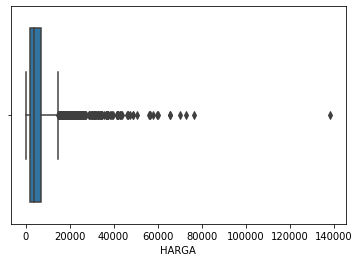

In [167]:
#persebaran harga produk
sns.boxplot(customer_data["HARGA"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


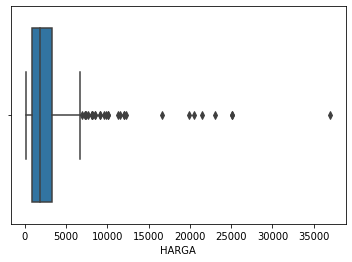

In [163]:
#persebaran harga produk
sns.boxplot(data_produk["HARGA"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


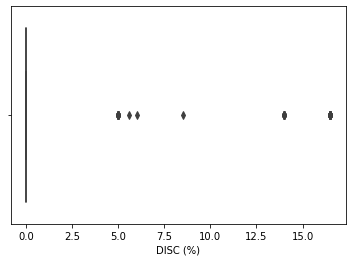

In [168]:
#persebaran data DISC (%)
#otomatis DISC (Rp) jga seperti ini
sns.boxplot(customer_data["DISC (%)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


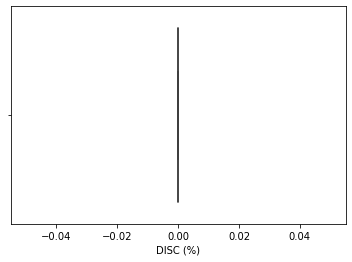

In [165]:
#persebaran data DISC (%)
#otomatis DISC (Rp) jga seperti ini
sns.boxplot(data_produk["DISC (%)"])

data yang diambil dari baris 3001:3025 dikarenakan data selain itu kurang jelas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


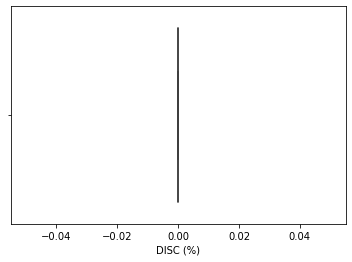

In [169]:
#otomatis DISC (Rp) jga seperti ini
#persebaran setelah data ke 3025-4117 mengalami outlier seperti ini
sns.boxplot(data_produk["DISC (%)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


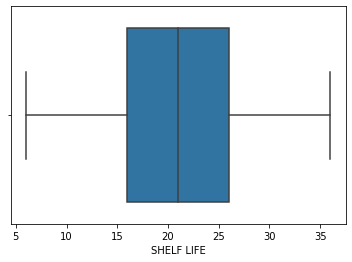

In [148]:
sns.boxplot(customer_data["SHELF LIFE"])

In [171]:
customer_data["SHELF LIFE"].mean()

20.978634270994053

kita tau bahwa persebarannya adalah dari 6 bulan-sekitar 36 bulan.

rata-rata shelf life diantara 21-22, sehingga data yg memiliki shelf life dibawah 20/21 termasuk shelf life yg singkat

In [172]:
customer_data["QTY"].mean()

1.324319666451772

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


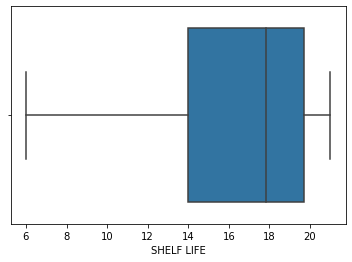

In [173]:
sns.boxplot(data_produk["SHELF LIFE"])

In [174]:
data_produk["QTY"].mean()

2.8090692191537383

In [154]:
customer_data

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
13,ROTI BASAH KOTABARU,13.0,1.214286,3585.714286,0.0,0.0,20.857143
14,ROTI BASAH SAMBILEGI,14.0,1.093750,4491.406250,0.0,0.0,20.726562
1005,SGM 3 VANILA BOX 300,1005.0,1.000000,13315.000000,0.0,0.0,21.000000
1006,DANCOW BLT MD 1+ 400,1006.0,1.400000,21430.000000,0.0,0.0,16.800000
1019,DANCOW BLT MD 3+ 400,1019.0,1.000000,21430.000000,0.0,0.0,21.000000
...,...,...,...,...,...,...,...
262989,KISPRAY 3IN1 6'MERAH,262989.0,1.666667,2040.000000,0.0,0.0,15.000000
262990,KISPRAY 3IN1 6'BIRU,262990.0,1.600000,2040.000000,0.0,0.0,18.300000
262991,KISPRAY 3IN1 6'KNG,262991.0,1.000000,2040.000000,0.0,0.0,19.000000


In [175]:
data_produk

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
1006,DANCOW BLT MD 1+ 400,1006.0,1.400000,21430.000000,0.0,0.0,16.800000
1073,SGM 4 MADU 150,1073.0,3.000000,6680.000000,0.0,0.0,10.000000
1123,SGM 3 VANILA BOX 600,1123.0,1.444444,23082.222222,0.0,0.0,19.666667
2049,ANMUM 200 PLAIN,2049.0,2.000000,20510.000000,0.0,0.0,12.000000
3006,DANCOW INST BOX 200,3006.0,1.400000,9160.000000,0.0,0.0,18.800000
...,...,...,...,...,...,...,...
261601,PIRING BLT.S MA-002A,261601.0,7.000000,1200.000000,0.0,0.0,21.000000
262965,NATURAL PACK 0.8/SGT,262965.0,1.500000,3775.000000,0.0,0.0,20.500000
262988,KISPRAY 3IN1 6'VIOLT,262988.0,2.470588,2040.000000,0.0,0.0,19.000000


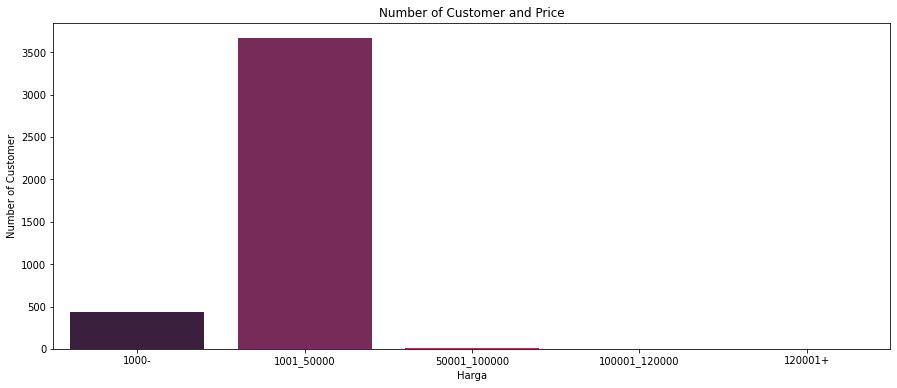

In [ ]:
# Menggolongkan harga dan melihat persebarannya dalam data
harga1000below = customer_data.HARGA[customer_data.HARGA <= 1000]
harga1001_50000 = customer_data.HARGA[(customer_data.HARGA <= 50000) & (customer_data.HARGA >= 1001)]
harga50001_100000 = customer_data.HARGA[(customer_data.HARGA <= 100000) & (customer_data.HARGA >= 50001)]
harga100001_120000= customer_data.HARGA[(customer_data.HARGA <= 120000) & (customer_data.HARGA >= 100001)]
harga120001above = customer_data.HARGA[customer_data.HARGA >= 120001]

x = ["1000-","1001_50000","50001_100000","100001_120000","120001+"]
y = [len(harga1000below.values),len(harga1001_50000.values),len(harga50001_100000.values),len(harga100001_120000.values),len(harga120001above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Price")
plt.xlabel("Harga")
plt.ylabel("Number of Customer")
plt.show()

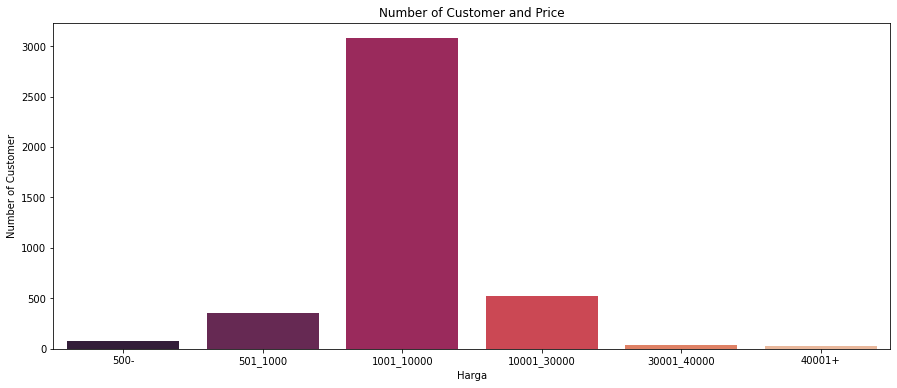

In [ ]:
# Menggolongkan usia dan melihat persebarannya dalam data
harga500below = customer_data.HARGA[customer_data.HARGA <= 500]
harga501_1000 = customer_data.HARGA[(customer_data.HARGA <= 1000) & (customer_data.HARGA >=501)]
harga1001_10000 = customer_data.HARGA[(customer_data.HARGA <= 10000) & (customer_data.HARGA >= 1001)]
harga10001_30000= customer_data.HARGA[(customer_data.HARGA <= 30000) & (customer_data.HARGA >= 10001)]
harga30001_40000 = customer_data.HARGA[(customer_data.HARGA <= 40000) & (customer_data.HARGA >= 30001)]
harga40001above =customer_data.HARGA[customer_data.HARGA >= 40001]
x = ["500-","501_1000","1001_10000","10001_30000","30001_40000", "40001+"]
y = [len(harga500below.values),len(harga501_1000.values),len(harga1001_10000.values),len(harga10001_30000.values),len(harga30001_40000.values), len(harga40001above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Price")
plt.xlabel("Harga")
plt.ylabel("Number of Customer")
plt.show()

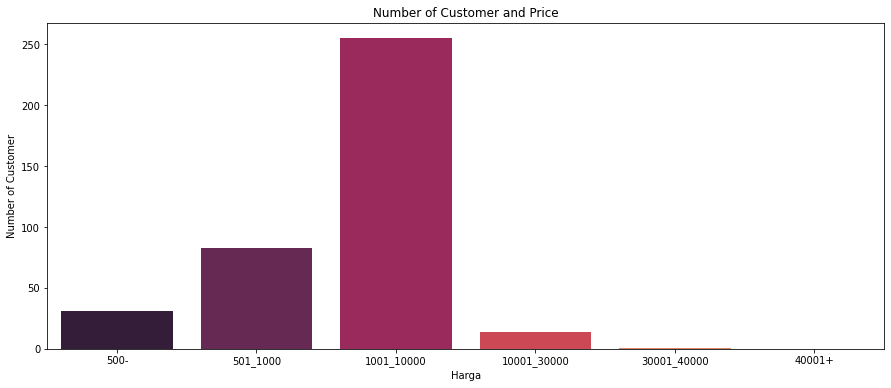

In [176]:
# Menggolongkan usia dan melihat persebarannya dalam data_produk
harga500below = data_produk.HARGA[data_produk.HARGA <= 500]
harga501_1000 = data_produk.HARGA[(data_produk.HARGA <= 1000) & (data_produk.HARGA >=501)]
harga1001_10000 = data_produk.HARGA[(data_produk.HARGA <= 10000) & (data_produk.HARGA >= 1001)]
harga10001_30000= data_produk.HARGA[(data_produk.HARGA <= 30000) & (data_produk.HARGA >= 10001)]
harga30001_40000 = data_produk.HARGA[(data_produk.HARGA <= 40000) & (data_produk.HARGA >= 30001)]
harga40001above =data_produk.HARGA[data_produk.HARGA >= 40001]
x = ["500-","501_1000","1001_10000","10001_30000","30001_40000", "40001+"]
y = [len(harga500below.values),len(harga501_1000.values),len(harga1001_10000.values),len(harga10001_30000.values),len(harga30001_40000.values), len(harga40001above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Price")
plt.xlabel("Harga")
plt.ylabel("Number of Customer")
plt.show()

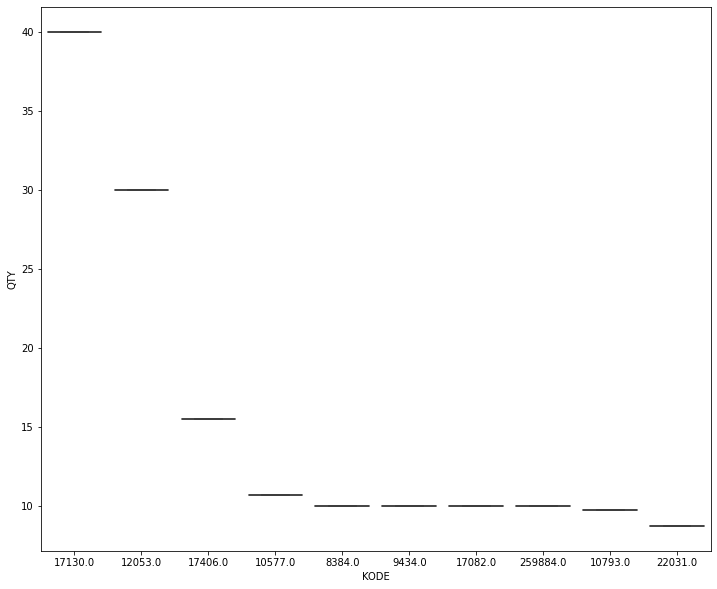

In [249]:
# Persebaran KODE and QTY
plt.figure(figsize=(12,10))
sns.boxplot(x=data_produk_qty_highest[0:10]['KODE'], y=data_produk_qty_highest[0:10]["QTY"], data=data_produk_qty_highest[0:10])
plt.show()

In [183]:
data_produk_qty_highest[0:10]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17130,INDOMI KARI AYAM,17130.0,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,12053.0,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,17406.0,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,10577.0,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,8384.0,10.000000,1190.0,0.0,0.0,10.000000
9434,SAJIKU GORENG UDANG,9434.0,10.000000,1190.0,0.0,0.0,13.000000
17082,GAGA MI 100 AYAM BWG,17082.0,10.000000,880.0,0.0,0.0,19.000000
259884,SDK ES 320 /WJY,259884.0,10.000000,900.0,0.0,0.0,15.000000
10793,MIO WF VAN 18 GR,10793.0,9.750000,410.0,0.0,0.0,20.500000


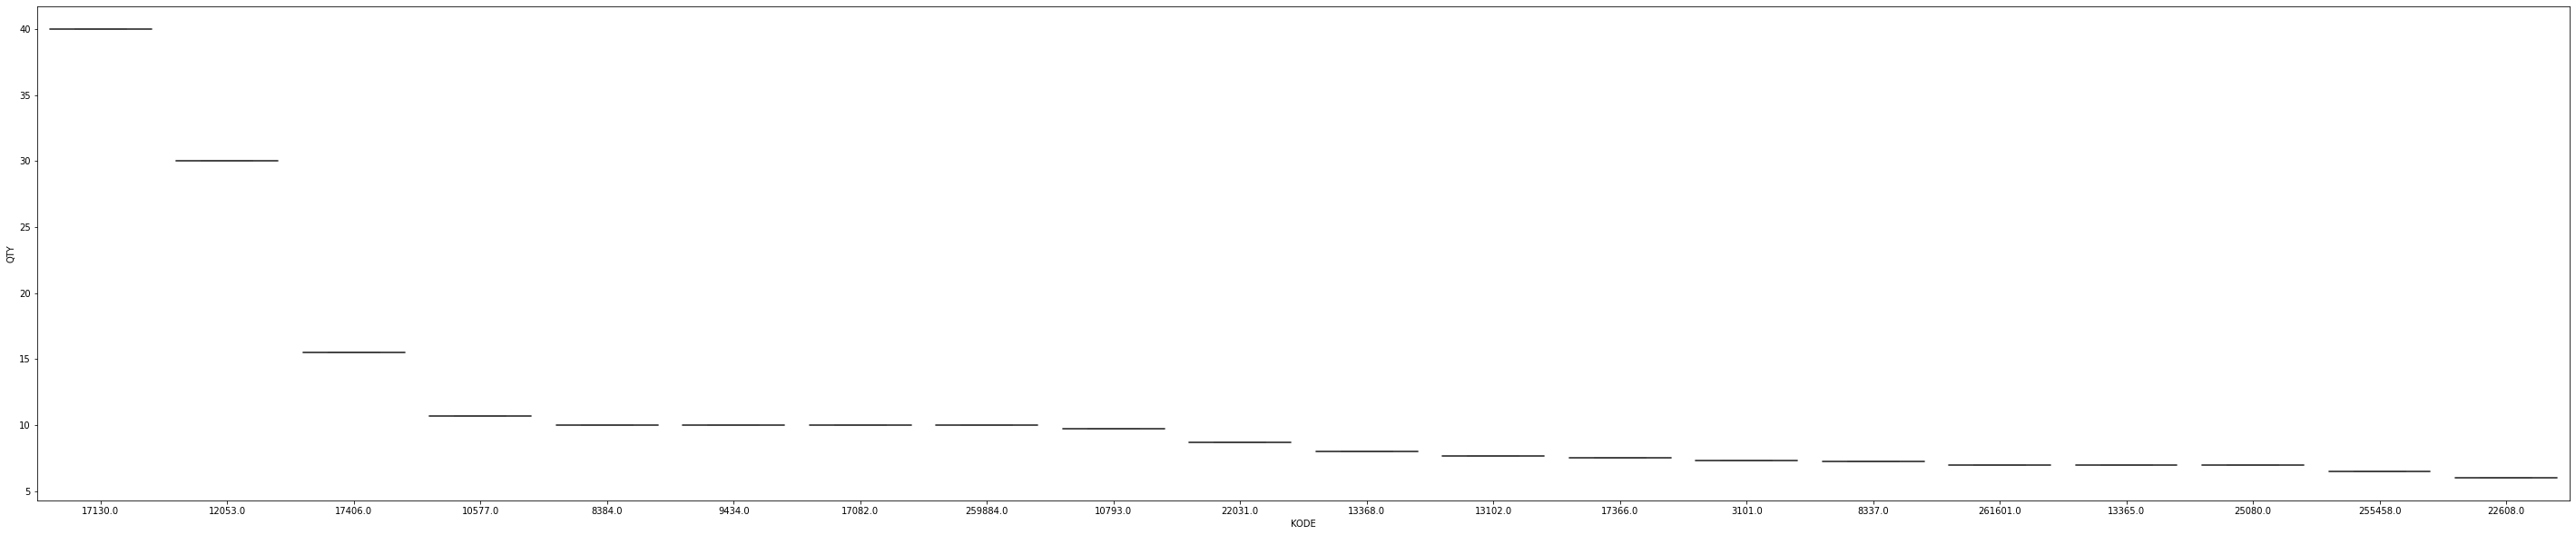

In [187]:
# Persebaran KODE and QTY
plt.figure(figsize=(50,10))
sns.boxplot(x=data_produk_qty_highest["KODE"][0:20], y=data_produk_qty_highest["QTY"][0:20], data=data_produk_qty_highest[0:50])
plt.show()



```
karena tidak terlihat, data tidak terbaca, harus mengkatorikan lebih singkat lagi
```



======================================================
MASUK KE CATEGORY

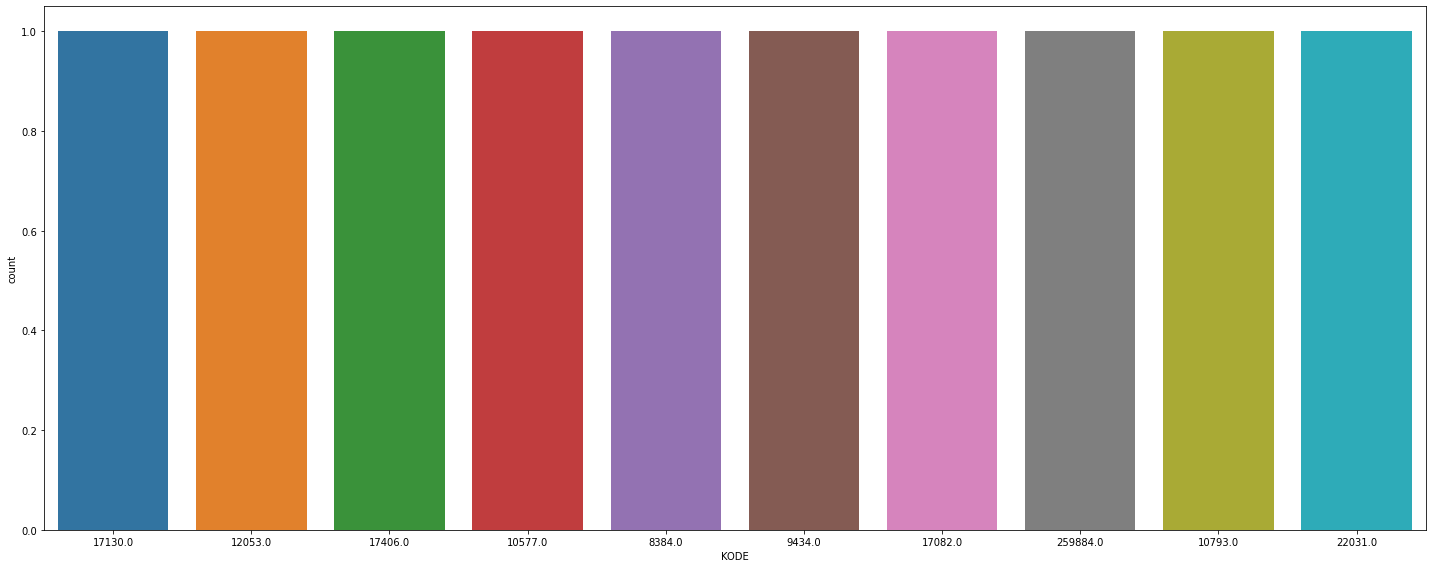

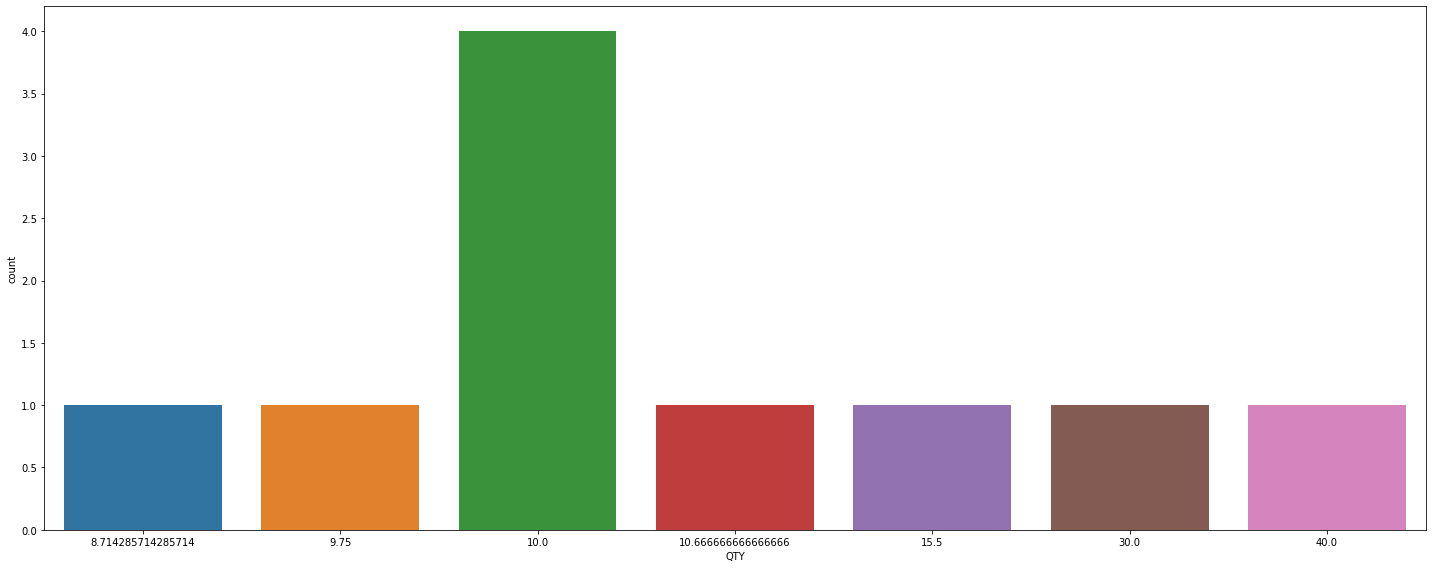

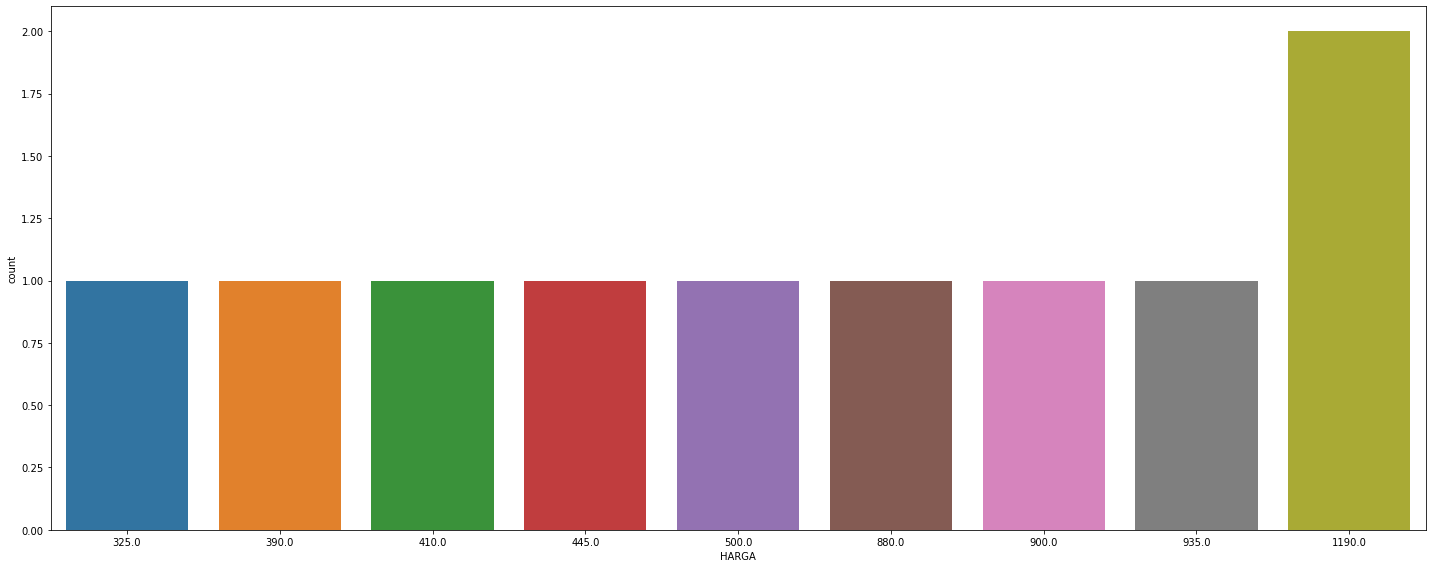

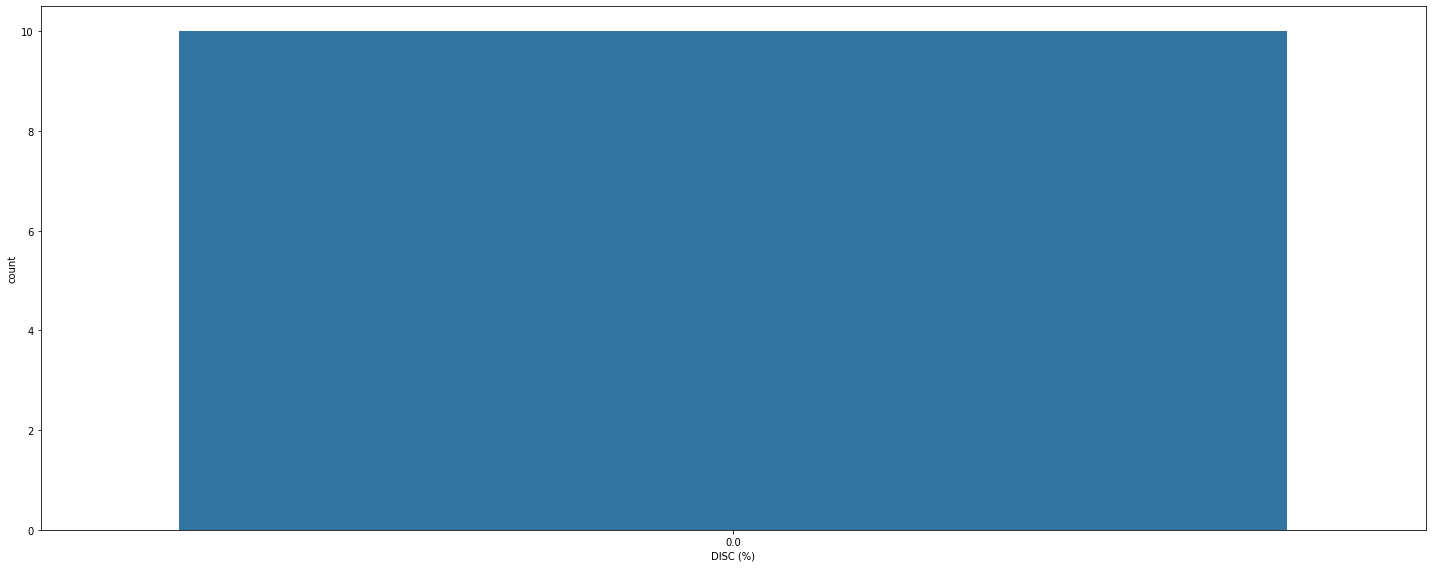

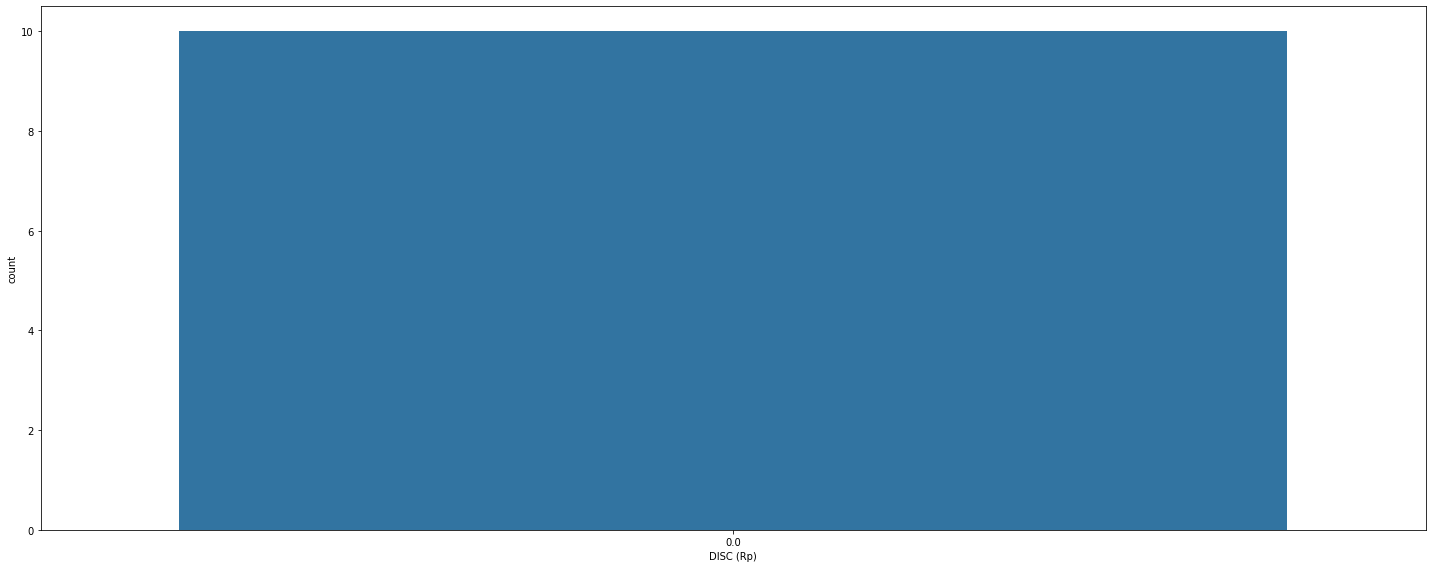

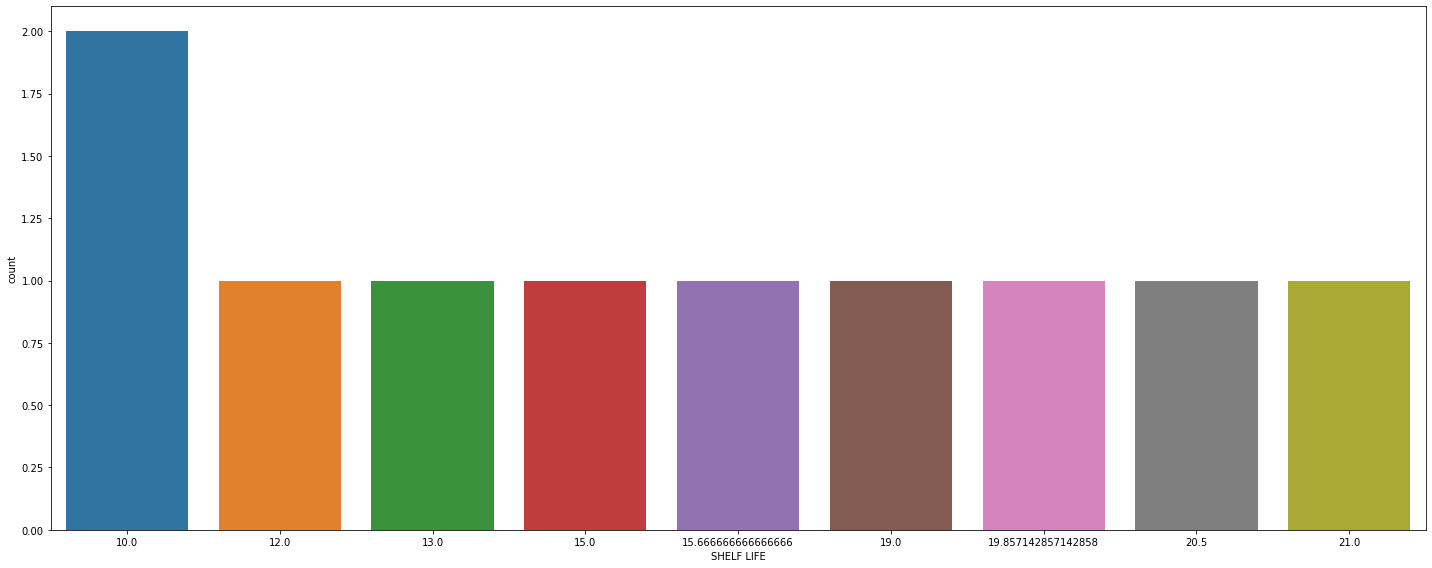

In [188]:
for col in categorical:
    plt.figure(figsize=(20,8))
    sns.countplot(x=col, data=data_produk_qty_highest[0:10])
    plt.tight_layout()

## Data Preprocessing

### Encode Categorical

In [189]:
#DATA ASLI 
customer_data

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
13,ROTI BASAH KOTABARU,13.0,1.214286,3585.714286,0.0,0.0,20.857143
14,ROTI BASAH SAMBILEGI,14.0,1.093750,4491.406250,0.0,0.0,20.726562
1005,SGM 3 VANILA BOX 300,1005.0,1.000000,13315.000000,0.0,0.0,21.000000
1006,DANCOW BLT MD 1+ 400,1006.0,1.400000,21430.000000,0.0,0.0,16.800000
1019,DANCOW BLT MD 3+ 400,1019.0,1.000000,21430.000000,0.0,0.0,21.000000
...,...,...,...,...,...,...,...
262989,KISPRAY 3IN1 6'MERAH,262989.0,1.666667,2040.000000,0.0,0.0,15.000000
262990,KISPRAY 3IN1 6'BIRU,262990.0,1.600000,2040.000000,0.0,0.0,18.300000
262991,KISPRAY 3IN1 6'KNG,262991.0,1.000000,2040.000000,0.0,0.0,19.000000


In [192]:
#DATA SAMPEL YANG DIASUMISKAN AKAN DI RESTOCK
data_produk_qty_highest

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17130,INDOMI KARI AYAM,17130.0,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,12053.0,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,17406.0,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,10577.0,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,8384.0,10.000000,1190.0,0.0,0.0,10.000000
...,...,...,...,...,...,...,...
100252,SURF 40x6's LIME FRS,100252.0,1.400000,2370.0,0.0,0.0,19.400000
68629,DREAM HNY SOAP 80,68629.0,1.400000,1765.0,0.0,0.0,20.000000
3006,DANCOW INST BOX 200,3006.0,1.400000,9160.0,0.0,0.0,18.800000


In [193]:
data_produk_qty_highest.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 384 entries, (17130, 'INDOMI KARI AYAM') to (1006, 'DANCOW BLT MD 1+ 400')
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KODE        384 non-null    object 
 1   QTY         384 non-null    float64
 2   HARGA       384 non-null    float64
 3   DISC (%)    384 non-null    float64
 4   DISC (Rp)   384 non-null    float64
 5   SHELF LIFE  384 non-null    float64
dtypes: float64(5), object(1)
memory usage: 243.9+ KB


In [ ]:
customer_data['KODE'] = customer_data['KODE'].astype(str)

In [194]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = data_produk_qty_highest[['KODE']].apply(label_encoder.fit_transform)

# Menggabungkan kolom umur dan nilai belanja setahun dengan data kategori
cluster_data = pd.concat([encoded_data, data_produk_qty_highest[["QTY", "HARGA", "DISC (%)", "DISC (Rp)", "SHELF LIFE"]]], axis=1)

cluster_data.head()

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17130,INDOMI KARI AYAM,156,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,91,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,166,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,66,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,369,10.000000,1190.0,0.0,0.0,10.000000


### Features Selection
Dalam proses ini akan dipilih variabel yang memiliki pengaruh besar dalam penentuan cluster data.

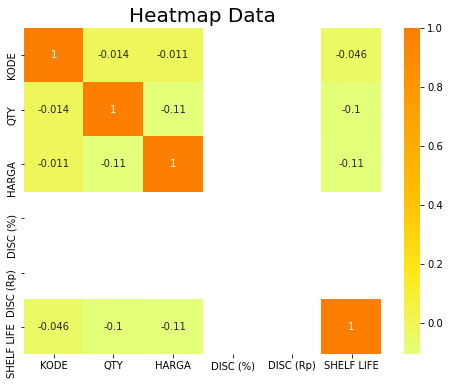

In [195]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

In [ ]:
qty-harga, harga-diskon(Rp), diskon(Rp)-self life

### Scaling Data
Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [196]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["KODE"], axis = 1)
cluster_data.head()

,,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,
17130,INDOMI KARI AYAM,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,10.000000,1190.0,0.0,0.0,10.000000


In [197]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["QTY", "HARGA", "DISC (%)", "DISC (Rp)", "SHELF LIFE"]]=scaler.fit_transform(cluster_data[["QTY", "HARGA", "DISC (%)", "DISC (Rp)", "SHELF LIFE"]])
cluster_data.head()

,,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,
17130,INDOMI KARI AYAM,12.781113,-0.528598,0.0,0.0,-1.591250
12053,ALPENLI-LOLLI STRAWB,9.344492,-0.670311,0.0,0.0,-1.094874
17406,SELERA RAK.BASO,4.361392,-0.641708,0.0,0.0,1.138815
10577,MIO MIO STICK 18 GR,2.700358,-0.656009,0.0,0.0,-0.184853
8384,POCI BIRU 40/KCL,2.471250,-0.462292,0.0,0.0,-1.591250


## KMeans Cluster

In [198]:
cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [199]:
segment = pd.Series(cluster.labels_, name="segment")

### Menentukan Nilai Optimal K (kelompok)

Akan digunakan metode Elbow untuk menentukan jumlah k optimal.

In [200]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

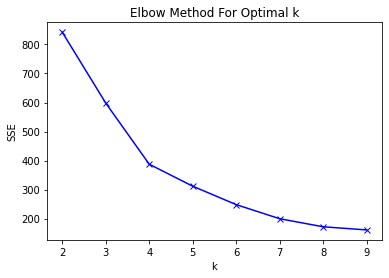

In [201]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

### Evaluation Model

Menggunakan silhouette score untuk konfirmasi k-kluster

In [202]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47064767877017905
For n_clusters = 3, silhouette score is 0.46762982727238134
For n_clusters = 4, silhouette score is 0.4630605635271845
For n_clusters = 5, silhouette score is 0.4871581183778578
For n_clusters = 6, silhouette score is 0.420160897268491
For n_clusters = 7, silhouette score is 0.38432921659635294
For n_clusters = 8, silhouette score is 0.3876143854681248
For n_clusters = 9, silhouette score is 0.38529362153862573


Dari silhouette model didapat k-kluster yang optimum adalah 2, sama seperti pemilihan cluster dengan elbow method. Oleh karena itu, untuk kedepannya akan digunakan k=2 yang artinya PRODUK akan dibagi kedalam 2 kelompok.

In [203]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=5)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [204]:
segment = pd.Series(cluster.labels_, name="segment")

In [235]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([dataextrack_produk, segment], axis=1)
results

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE,segment
0,17130.0,40.000000,935.0,0,0,10.000000,1
1,12053.0,30.000000,390.0,0,0,12.000000,1
2,17406.0,15.500000,500.0,0,0,21.000000,4
3,10577.0,10.666667,445.0,0,0,15.666667,4
4,8384.0,10.000000,1190.0,0,0,10.000000,4
...,...,...,...,...,...,...,...
379,100252.0,1.400000,2370.0,0,0,19.400000,0
380,68629.0,1.400000,1765.0,0,0,20.000000,0
381,3006.0,1.400000,9160.0,0,0,18.800000,0
382,24640.0,1.400000,1400.0,0,0,20.200000,0


In [236]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE,segment
24,3103.0,5.400000,4530.0,0,0,20.600000,0
37,22036.0,4.750000,240.0,0,0,20.750000,0
38,17041.0,4.745455,770.0,0,0,20.636364,0
39,72137.0,4.500000,3165.0,0,0,15.500000,0
42,13001.0,4.500000,910.0,0,0,19.500000,0


In [238]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE,segment
0,17130.0,40.0,935.0,0,0,10.0,1
1,12053.0,30.0,390.0,0,0,12.0,1


In [239]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==2][:5]

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE,segment
19,22608.0,6.0,1650.0,0,0,10.0,2
20,255722.0,6.0,1625.0,0,0,8.0,2
21,28481.0,6.0,2700.0,0,0,8.0,2
23,22631.0,5.5,11500.0,0,0,16.0,2
26,9162.0,5.0,215.0,0,0,7.0,2


In [240]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==3][:5]

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE,segment
136,17444.0,2.428571,37000.0,0,0,19.142857,3
194,253654.0,2.000000,16675.0,0,0,12.000000,3
228,2049.0,2.000000,20510.0,0,0,12.000000,3
239,3167.0,2.000000,25140.0,0,0,10.000000,3
243,3168.0,2.000000,25140.0,0,0,10.000000,3


In [241]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==4][:5]

,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE,segment
2,17406.0,15.500000,500.0,0,0,21.000000,4
3,10577.0,10.666667,445.0,0,0,15.666667,4
4,8384.0,10.000000,1190.0,0,0,10.000000,4
5,9434.0,10.000000,1190.0,0,0,13.000000,4
6,17082.0,10.000000,880.0,0,0,19.000000,4


## EDA CLUSTER



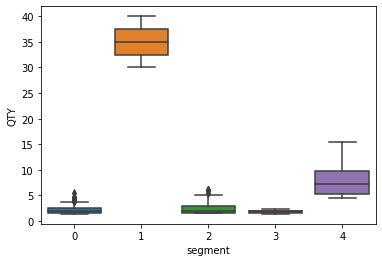

In [242]:
# Pengelompokan customer berdasarkan usia
sns.boxplot(x=results["segment"], y=results["QTY"], data=results)

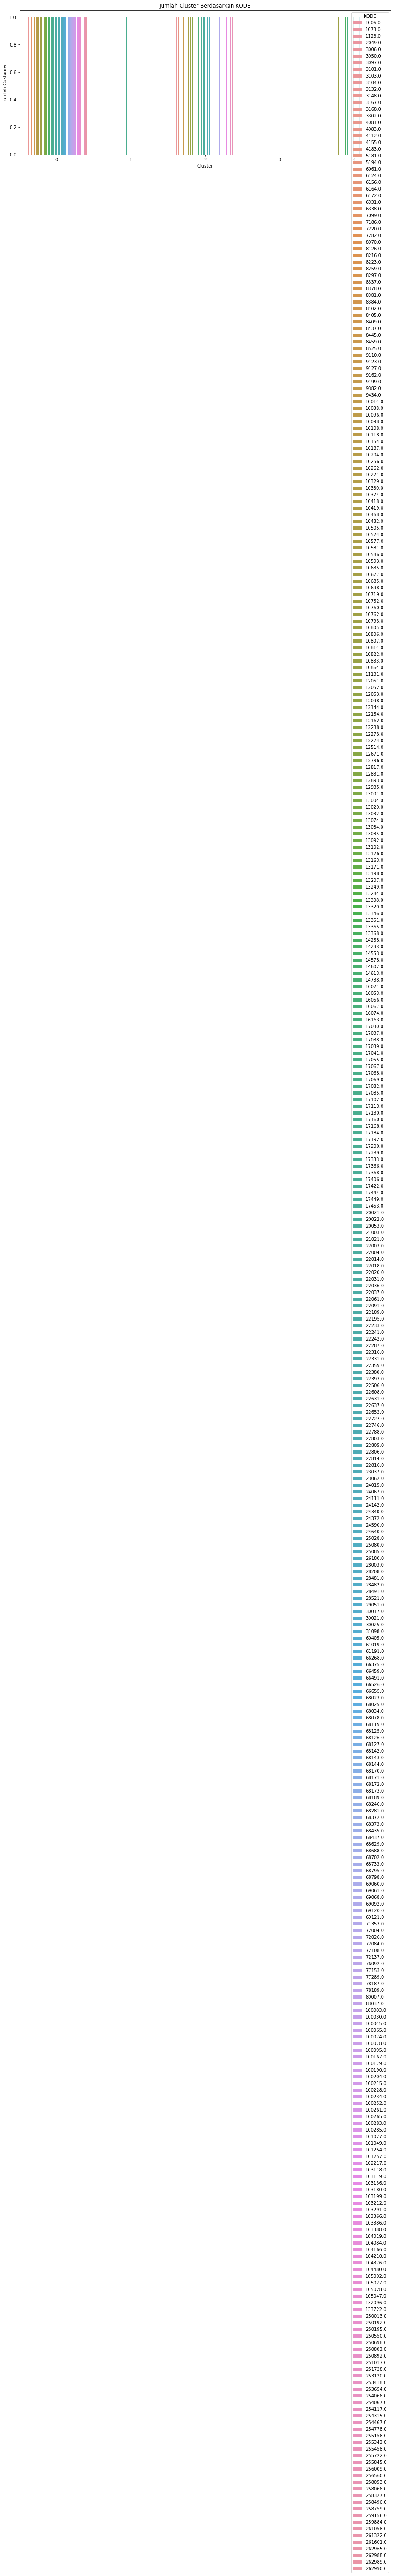

In [243]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="KODE")
plt.title("Jumlah Cluster Berdasarkan KODE")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

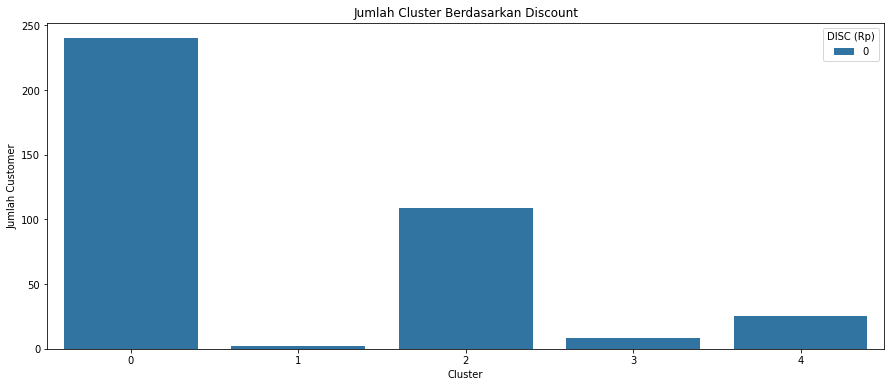

In [244]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="DISC (Rp)")
plt.title("Jumlah Cluster Berdasarkan Discount")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

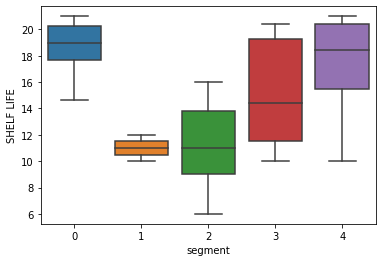

In [245]:
sns.boxplot(x=results["segment"], y=results["SHELF LIFE"], data=results)

In [246]:
data_produk_qty_highest

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17130,INDOMI KARI AYAM,17130.0,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,12053.0,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,17406.0,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,10577.0,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,8384.0,10.000000,1190.0,0.0,0.0,10.000000
...,...,...,...,...,...,...,...
100252,SURF 40x6's LIME FRS,100252.0,1.400000,2370.0,0.0,0.0,19.400000
68629,DREAM HNY SOAP 80,68629.0,1.400000,1765.0,0.0,0.0,20.000000
3006,DANCOW INST BOX 200,3006.0,1.400000,9160.0,0.0,0.0,18.800000


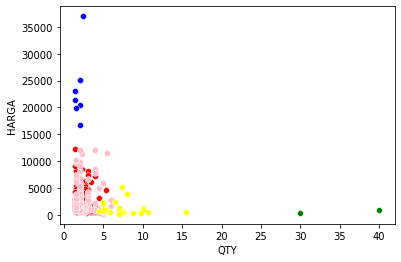

In [247]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["segment"]==0].QTY, y=results[results["segment"]==0].HARGA , color="red")
sns.scatterplot(x=results[results["segment"]==1].QTY, y=results[results["segment"]==1].HARGA, color="green")
sns.scatterplot(x=results[results["segment"]==2].QTY, y=results[results["segment"]==2].HARGA, color="pink")
sns.scatterplot(x=results[results["segment"]==3].QTY, y=results[results["segment"]==3].HARGA, color="blue")
sns.scatterplot(x=results[results["segment"]==4].QTY, y=results[results["segment"]==4].HARGA, color="yellow")

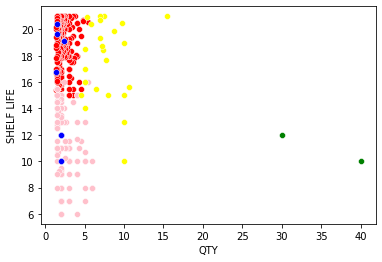

In [248]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["segment"]==0].QTY, y=results[results["segment"]==0]['SHELF LIFE'] , color="red")
sns.scatterplot(x=results[results["segment"]==1].QTY, y=results[results["segment"]==1]['SHELF LIFE'], color="green")
sns.scatterplot(x=results[results["segment"]==2].QTY, y=results[results["segment"]==2]['SHELF LIFE'], color="pink")
sns.scatterplot(x=results[results["segment"]==3].QTY, y=results[results["segment"]==3]['SHELF LIFE'], color="blue")
sns.scatterplot(x=results[results["segment"]==4].QTY, y=results[results["segment"]==4]['SHELF LIFE'], color="yellow")